 # Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

# Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Normalize the image

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

# Add noise to Image

In [5]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Input

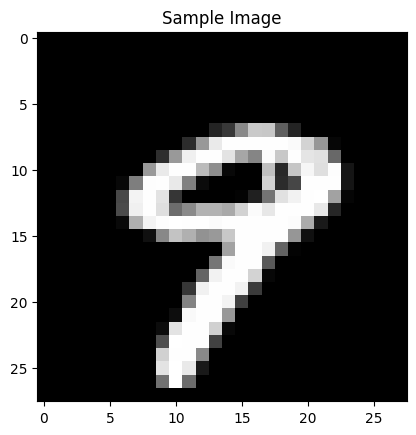

In [7]:
# np.random.randint(len(x_test))
index =9 
plt.imshow(x_test[index].reshape(28,28))
plt.title('Sample Image')
plt.gray()

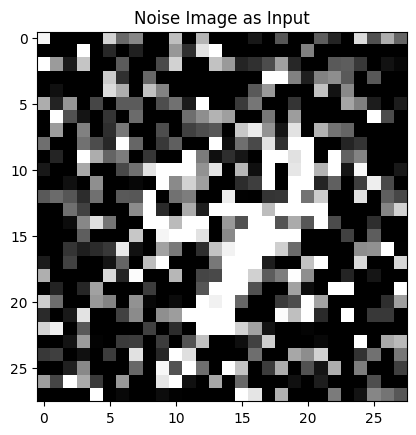

In [8]:
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.title('Noise Image as Input')
plt.gray()

# Model Creation


In [9]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

C:\Users\Deon Samuel\Desktop\DL PRojects\ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 88ms/step - loss: 0.3175 - val_loss: 0.1483
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.1450 - val_loss: 0.1356
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1351 - val_loss: 0.1297
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.1301 - val_loss: 0.1265
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1273 - val_loss: 0.1243
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 0.1248 - val_loss: 0.1224
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 0.1229 - val_loss: 0.1208
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.1216 - val_loss: 0.1196
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.1205 - val_loss: 0.1184
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1195 - val_loss: 0.1182
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 0.1189 - val_loss: 0.1170
Epoch 12/20
235/235 ━━━━━━━━━━

In [11]:
pred = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


# Result

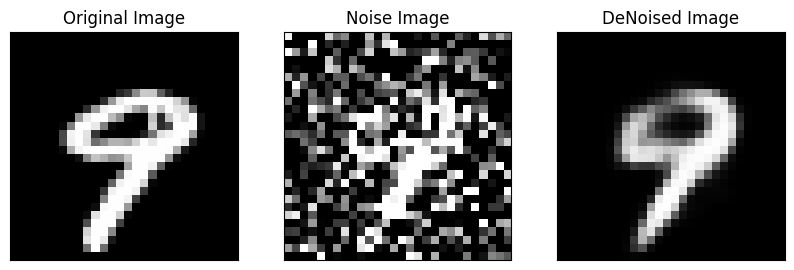

In [12]:
plt.figure(figsize=(10, 4))

ax = plt.subplot(1,3,1)
plt.imshow(x_test[index].reshape(28,28))
plt.title('Original Image')
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.title('Noise Image')
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 3)
plt.imshow(pred[index].reshape(28,28))
plt.title('DeNoised Image')
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()